In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
print(sys.path)
import pandas as pd
import matplotlib.pyplot as plt
from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution

['/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/miniconda3/envs/radCAD/lib/python312.zip', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/lib-dynload', '', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/site-packages']


In [39]:
# Read the data
path_to_runs = Path("../../results/simulations/withdrawal_queue_replacement/")
# path_to_runs = Path("../../results/simulations/model_validation/")
print(path_to_runs.resolve())
print(path_to_runs.resolve().exists())
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(path_to_runs.resolve())

# Optional: save the plot
# plt.savefig('reaction_speed_distribution.png', bbox_inches='tight')

/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/withdrawal_queue_replacement
True


In [44]:
from experiments.analysis_utils.metrics import calculate_time_to_first_veto
veto_times = calculate_time_to_first_veto(timestep_data_df_full)

# Basic statistics
print("Time to first veto statistics:")
print(f"Runs with vetoes: {veto_times['time_to_first_veto'].notna().sum()}")
print(f"Runs without vetoes: {veto_times['time_to_first_veto'].isna().sum()}")
print(f"\nFor runs with vetoes:")
print(f"Mean time to first veto: {veto_times['time_to_first_veto'].mean():.2f}")
print(f"Median time to first veto: {veto_times['time_to_first_veto'].median():.2f}")

# With seal parameters
veto_times_with_params = veto_times.merge(
    start_data_df_full[['run_id', 'first_seal_rage_quit_support', 'second_seal_rage_quit_support']], 
    on='run_id'
)

Time to first veto statistics:
Runs with vetoes: 1968
Runs without vetoes: 1022

For runs with vetoes:
Mean time to first veto: 29.01
Median time to first veto: 28.00


In [54]:
from experiments.analysis_utils.metrics import analyze_veto_timing_by_seals

veto_stats = analyze_veto_timing_by_seals(timestep_data_df_full, start_data_df_full)
print("Veto statistics by seal parameters:")
display(veto_stats)

# Example for specific seal values
veto_seal = 0.01
rage_seal = 0.1
specific_stats = veto_stats.loc[veto_seal, rage_seal]
print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}:")
print(f"Veto rate: {specific_stats['veto_rate']:.1f}%")
print(f"Mean time to veto: {specific_stats['mean_time_to_veto']:.2f}")
print(f"Median time to veto: {specific_stats['median_time_to_veto']:.2f}")
print(f"Total runs: {specific_stats['total_runs']}")

veto_stats.to_csv("veto_stats.csv")

Veto statistics by seal parameters:


,,veto_rate,mean_time_to_veto,median_time_to_veto,hours_mean_time_to_veto_hours,hours_median_time_to_veto_hours,total_runs
first_seal_rage_quit_support,second_seal_rage_quit_support,,,,,,
0.0100,0.1,100.000000,24.990215,25.0,74.970646,75.0,511
0.0125,0.1,100.000000,27.188000,27.0,81.564000,81.0,500
0.0150,0.1,98.800000,29.945344,30.0,89.836032,90.0,500
0.0175,0.1,76.400000,33.772251,33.0,101.316754,99.0,500
0.0200,0.1,18.585859,36.000000,36.0,108.000000,108.0,495
0.0300,0.1,0.000000,NaN,NaN,NaN,NaN,495



Statistics for veto_seal=0.01, rage_seal=0.1:
Veto rate: 100.0%
Mean time to veto: 24.99
Median time to veto: 25.00
Total runs: 511.0


In [40]:
start_data_df_full

,seed,first_seal_rage_quit_support,second_seal_rage_quit_support,simulation_hash,n_actors,Normal,Quick,Slow,NoReaction,BaseActor,HonestActor,SingleAttacker,CoordinatedAttacker,Hacker,SingleDefender,CoordinatedDefender,run_id
0,241,0.0100,0.1,45fac8345bc279635e2b89324198185de5e88f8fe5f9be...,1986,209,43,1636,98,0,1982,4,0,0,0,0,0
1,242,0.0200,0.1,8657caa4095c1f115572f29665258275abf8f48c3ee6d5...,1986,227,49,1612,98,0,1982,4,0,0,0,0,1
2,245,0.0100,0.1,9938ea254f696d888dccceec4a02487d7b05218cb629f2...,1986,220,28,1640,98,0,1984,2,0,0,0,0,2
3,243,0.0300,0.1,2495309d5762b3e7116fa2b20e3f8dbf4567f5f05be5aa...,1986,234,40,1615,97,0,1978,8,0,0,0,0,3
4,246,0.0200,0.1,b7cbb7539db67057f625846509df226b5c5333dd80d649...,1986,226,33,1629,98,0,1984,2,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,189,0.0125,0.1,1478f3202618a1ca451fdf1dfbcdaee050cc8d872ebe5e...,1986,224,49,1615,98,0,1981,5,0,0,0,0,2985
96,188,0.0150,0.1,c09820071cdc20d80e8387d9e625715869ab98d76457cf...,1986,208,43,1637,98,0,1983,3,0,0,0,0,2986
97,189,0.0150,0.1,be5011fef547a816805badae821a450bd0e1b67af81094...,1986,224,49,1615,98,0,1981,5,0,0,0,0,2987
98,190,0.0125,0.1,fd2cbadf61217d5f4e47a8386a1184788ee31477e457a4...,1986,204,44,1641,97,0,1981,5,0,0,0,0,2988


In [41]:
from experiments.analysis_utils.metrics import calculate_proposal_stats_by_seals
stats_by_seals = calculate_proposal_stats_by_seals(proposal_df_full, start_data_df_full)
print("Proposal statistics by seal parameters:")
display(stats_by_seals)

# Example for specific seal values
veto_seal = 0.01
rage_seal = 0.1
specific_stats = stats_by_seals.loc[veto_seal, rage_seal]
print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}:")
print(f"Total proposals: {specific_stats['total_proposals']}")
for status, percentage in specific_stats.items():
    if status != 'total_proposals':
        print(f"{status}: {percentage:.1f}%")

Proposal statistics by seal parameters:


,,total_proposals,Cancelled,Executed
first_seal_rage_quit_support,second_seal_rage_quit_support,,,
0.0100,0.1,533,100.000000,0.000000
0.0125,0.1,500,100.000000,0.000000
0.0150,0.1,500,98.800000,1.200000
0.0175,0.1,500,76.400000,23.600000
0.0200,0.1,495,18.585859,81.414141
0.0300,0.1,495,0.000000,100.000000



Statistics for veto_seal=0.01, rage_seal=0.1:
Total proposals: 533.0
Cancelled: 100.0%
Executed: 0.0%


In [32]:
# from experiments.analysis_utils.metrics import calculate_proposal_stats
# proposal_stats = calculate_proposal_stats(proposal_df_full)



proposal_df_with_seals = proposal_df_full.merge(start_data_df_full, on='run_id')

proposals_status_name    False
dtype: bool

<Axes: title={'center': 'Actors reaction speed'}>

<Figure size 1000x800 with 0 Axes>

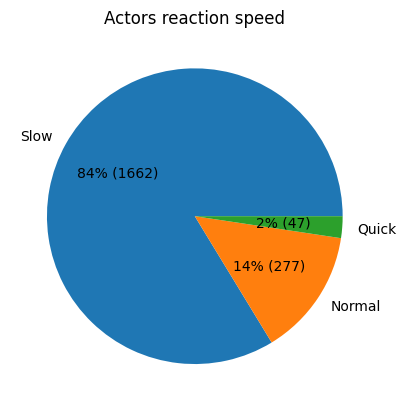

In [3]:
# Get data for a single run (using first run as example)
run_id = start_data_df_full['run_id'].iloc[0]

# Create the plot
plt.figure(figsize=(10, 8))
plot_reaction_speed_distribution(start_data_df_full, run_id=run_id)
# plt.show()

<Axes: title={'center': 'Tokens by reaction speed'}>

<Figure size 1000x800 with 0 Axes>

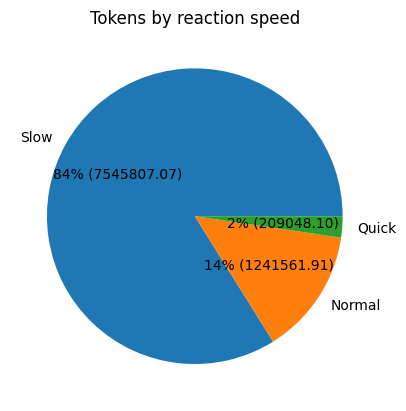

In [4]:
plt.figure(figsize=(10, 8))
plot_token_distribution(timestep_data_df_full, run_id=run_id)

In [9]:
from experiments.analysis_utils.metrics import estimate_actor_distribution, get_actor_proportions


alpha, cols =  estimate_actor_distribution(start_data_df_full)
print(alpha)
print(cols)

[[0.76283988 0.12688822 0.02165156]
 [0.76233635 0.13041289 0.01863041]
 [0.78147029 0.10725076 0.02265861]
 [0.76686808 0.12336354 0.02114804]
 [0.77039275 0.1203424  0.02064451]
 [0.75478348 0.13343404 0.02316213]
 [0.7673716  0.12588117 0.01812689]
 [0.76032226 0.13192346 0.01913394]
 [0.76787513 0.12336354 0.02014099]
 [0.75125881 0.14048338 0.01963746]
 [0.77442095 0.11329305 0.02366566]
 [0.77291037 0.11329305 0.02517623]
 [0.75377644 0.13544814 0.02215509]
 [0.77643505 0.11178248 0.02316213]
 [0.7653575  0.12386707 0.02215509]
 [0.76988922 0.12134945 0.02014099]
 [0.75528701 0.13544814 0.02064451]
 [0.76888218 0.12134945 0.02114804]
 [0.7693857  0.1183283  0.02366566]
 [0.75679758 0.13494461 0.01963746]
 [0.75730111 0.13494461 0.01913394]
 [0.7653575  0.12386707 0.02215509]
 [0.78096677 0.10926485 0.02114804]
 [0.77442095 0.12134945 0.01560926]
 [0.75981873 0.13343404 0.01812689]
 [0.76435045 0.12890232 0.01812689]
 [0.75780463 0.12839879 0.02517623]
 [0.77089627 0.11983887 0.02

In [8]:
import scipy.stats as stats
sample_proportions = stats.dirichlet.rvs(alpha=alpha, size=1)
print(sample_proportions)


ValueError: All parameters must be greater than 0

In [28]:
start_data_df_full.SingleAttacker.sum()

np.int64(0)

In [29]:
start_data_df_full.CoordinatedAttacker.sum()

np.int64(0)

In [30]:
start_data_df_full.Hacker.sum()

np.int64(0)

In [33]:
attacker_num = start_data_df_full[["SingleAttacker", "CoordinatedAttacker", "Hacker"]].sum(axis=1)
attacker_num.any()

np.False_